<a href="https://colab.research.google.com/github/luizrobertofreitas/colab-research-google/blob/master/CalculandoTaxaRetIndices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [0]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']
mydata = pd.DataFrame()
for t in tickers:
  mydata[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [34]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5840 entries, 1997-01-02 to 2020-03-17
Data columns (total 3 columns):
^GSPC     5840 non-null float64
^IXIC     5840 non-null float64
^GDAXI    5732 non-null float64
dtypes: float64(3)
memory usage: 182.5 KB


In [35]:
mydata.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [36]:
mydata.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-03-11,2741.379883,7952.049805,10438.679688
2020-03-12,2480.639893,7201.799805,9161.129883
2020-03-13,2711.020020,7874.879883,9232.080078
2020-03-16,2386.129883,6904.589844,8742.250000
2020-03-17,2529.189941,7334.779785,8939.099609


# Normalization to 100

(P1/P0) * 100

In [37]:
mydata.iloc[0]

^GSPC      737.010010
^IXIC     1280.699951
^GDAXI    2820.810059
Name: 1997-01-02 00:00:00, dtype: float64

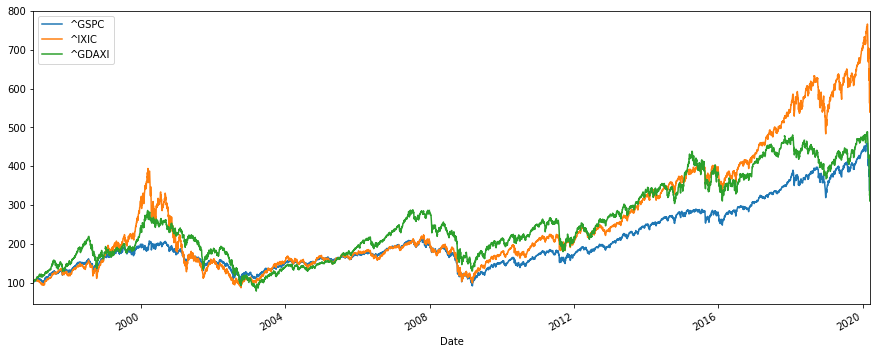

In [38]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

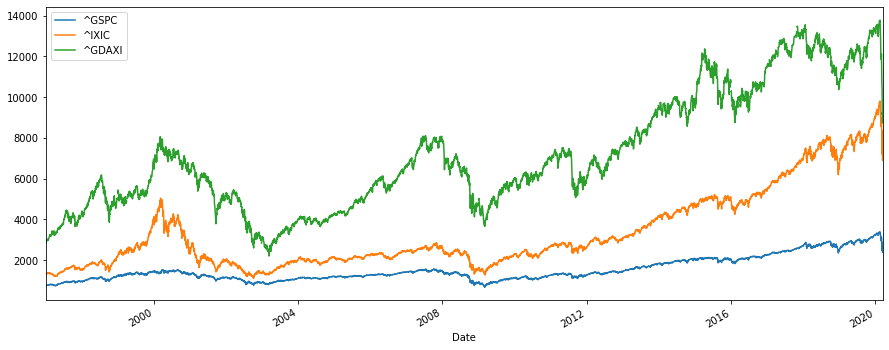

In [39]:
mydata.plot(figsize=(15,6))

In [40]:
mydata.loc['1997-01-03']

^GSPC      748.030029
^IXIC     1310.680054
^GDAXI    2863.260010
Name: 1997-01-03 00:00:00, dtype: float64

# Calculating the return of a portifolio of securities

In [41]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049
1997-01-06,-0.000508,0.004364,0.009409
1997-01-07,0.007463,0.008607,-0.004795
1997-01-08,-0.006399,-0.005558,0.009644


In [0]:
weights = np.array([0.25, 0.25, 0.25])

In [43]:
np.dot(returns, weights) # multiply returns by weights

array([        nan,  0.01335258,  0.00331624, ...,  0.04851898,
       -0.07402781,  0.0361942 ])

In [44]:
annual_returns = returns.mean() * 250
annual_returns

^GSPC     0.071607
^IXIC     0.106157
^GDAXI    0.061850
dtype: float64

In [45]:
np.dot(annual_returns, weights)

0.05990322452033261

In [46]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)

5.99%


In [0]:
weights_2 = np.array([0.4, 0.4, 0.2])

In [48]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print(pfolio_1)
print(pfolio_2)

5.99%
8.347999999999999%


In [0]:
comparison_t = ['PETR4.SA', '^BVSP', '^IBX50']
compare = pd.DataFrame()
for t in comparison_t:
  compare[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [63]:
compare.tail()

,PETR4.SA,^BVSP,^IBX50
Date,,,
2020-03-11,15.85,85171.0,13694.299805
2020-03-12,12.60,72583.0,11640.950195
2020-03-13,15.40,82678.0,13351.679688
2020-03-16,13.09,71168.0,11475.389648
2020-03-17,13.00,74617.0,12020.740234


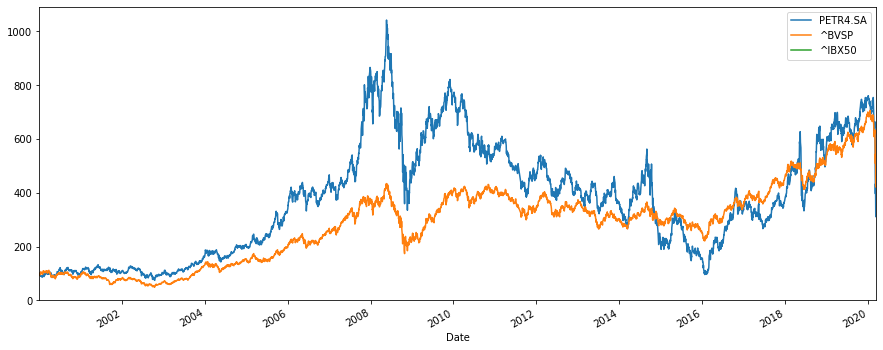

In [64]:
(compare / compare.iloc[0] * 100).plot(figsize=(15,6))
plt.show()